In [1]:
%run preprocessing.py

## Prediction of Gross margin 
gross margin = gross margin+cash discount + other income

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [3]:
# Define proper month mapping
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map the MONTH column to its index
df['month_index'] = df['MONTH'].map(month_mapping)


In [4]:
#Training and testing XGboooost
features = [' GROSS MARGIN ', ' CASH DISCOUNT ', ' OTHER INCOME ','YEAR','month_index']

X = df[features]
y = df[' GROSS MARGIN ']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training 
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

#Model Evaluation

y_pred = model.predict(X_test)

<Figure size 1000x600 with 0 Axes>

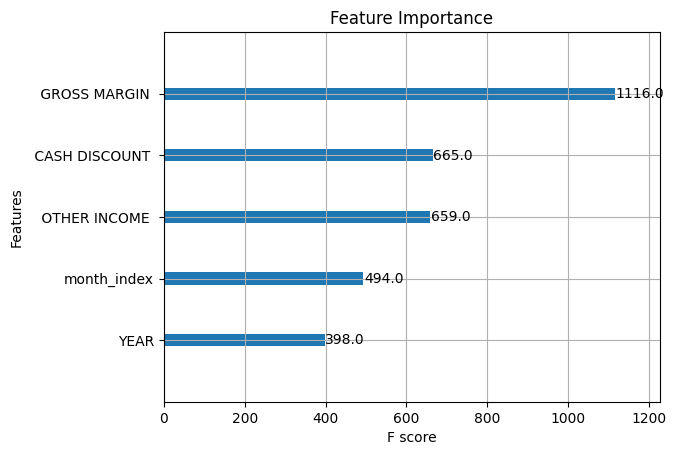

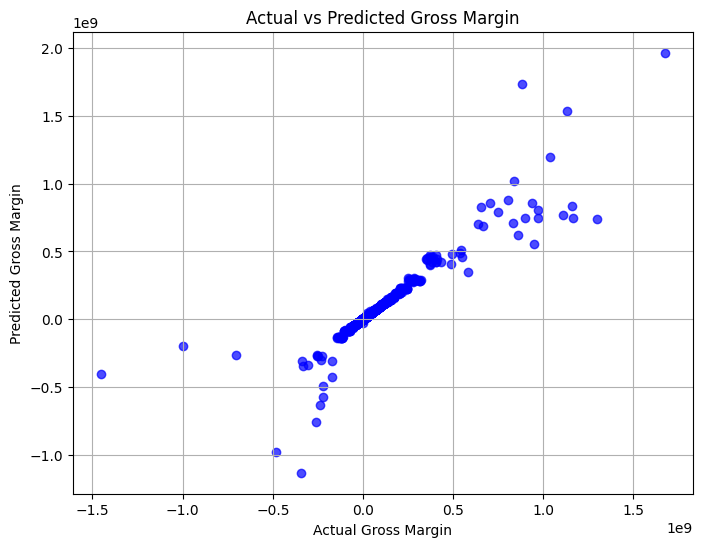

In [5]:
#Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

#Scatter Plot of Actual vs. Predicted Gross Margin
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Gross Margin')
plt.ylabel('Predicted Gross Margin')
plt.title('Actual vs Predicted Gross Margin')
plt.grid(True)
plt.show()

In [6]:
#mean absolute % error
def calculate_mape(y_true, y_pred):
    mape = np.mean(np.where(y_true != 0, np.abs((y_true - y_pred) / y_true), 0)) * 100
    return mape

mape_value = calculate_mape(y_test, y_pred)
print(f'MAPE: {mape_value:.2f}%')

MAPE: 46735.45%


In [7]:
#symmetric mean absolute % eror
def calculate_smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape = np.mean(np.where(denominator != 0, np.abs(y_true - y_pred) / denominator, 0)) * 100
    return smape

# Calculate SMAPE
smape_value = calculate_smape(y_test, y_pred)
print(f'SMAPE: {smape_value:.2f}%')

SMAPE: 9.52%


In [8]:
#plotting actual vs predicted with date
import plotly.graph_objects as go

month_year = df[['YEAR', 'month_index']].iloc[-len(y_test):].reset_index(drop=True)
month_year['Month-Year'] = pd.to_datetime(month_year['YEAR'].astype(str) + '-' + month_year['month_index'].astype(str).str.zfill(2))
y_pred_series = pd.Series(y_pred).reset_index(drop=True)
# Create DataFrame
results_df = pd.DataFrame({
    'Month-Year': month_year['Month-Year'],
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred_series.reset_index(drop=True)
})

results_df = results_df.sort_values(by='Month-Year')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df = results_df[results_df['Month-Year'] <= max_date]
filtered_results_df = filtered_results_df.groupby('Month-Year').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()


fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df['Month-Year'],
    y=filtered_results_df['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df['Month-Year'],
    y=filtered_results_df['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted GROSS MARGIN',
    xaxis_title='Month-Year',
    yaxis_title='GROSS MARGIN',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    template='plotly_dark',  
    xaxis_tickangle=-45  
)
fig.show()

## Predicting Revenue

In [9]:
#training XGboost 

features_rev = [' NET SALES ', ' SALES COMMISSION ', ' OTHER INCOME ','YEAR','month_index']

x= df[features_rev]
Y = df['C_Revenue']

#Train-Test Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x, Y, test_size=0.2, random_state=42)

#Model Training
model_2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_2.fit(X_train_r, y_train_r)

#Model Evaluation

y_pred_r = model_2.predict(X_test_r)

<Figure size 1000x600 with 0 Axes>

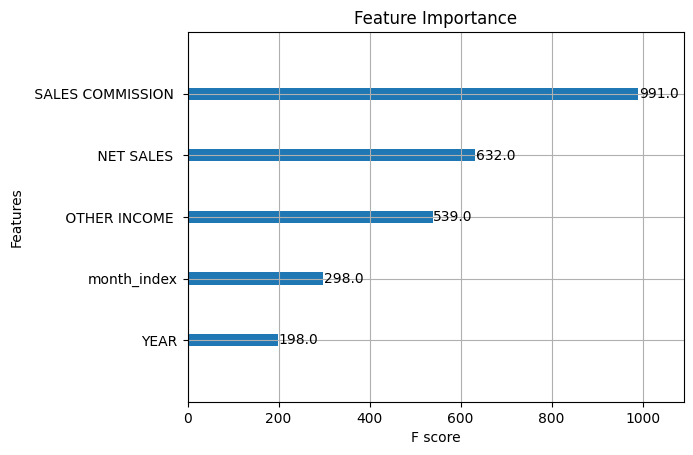

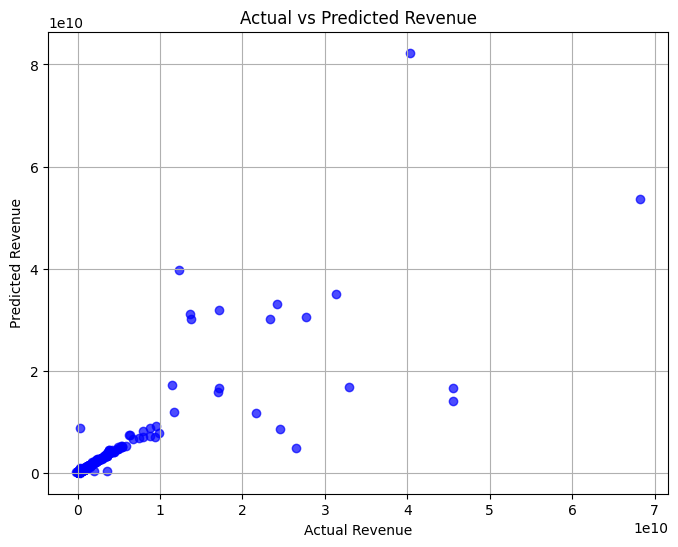

In [10]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_2)
plt.title("Feature Importance")
plt.show()

#Scatter Plot of Actual vs. Predicted Revenue
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.7, color='blue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.show()

In [11]:
#mean absolute % error

def calculate_mape(y_true, y_pred):
    mape = np.mean(np.where(y_true != 0, np.abs((y_true - y_pred) / y_true), 0)) * 100
    return mape

mape_value_r = calculate_mape(y_test_r, y_pred_r)
print(f'MAPE: {mape_value_r:.2f}%')

MAPE: 5066.72%


In [12]:
smape_value_r = calculate_smape(y_test_r, y_pred_r)
print(f'SMAPE: {smape_value_r:.2f}%')

SMAPE: 6.77%


In [13]:
#Actual vs Predicted revenue
month_year = df[['YEAR', 'month_index']].iloc[-len(y_test_r):].reset_index(drop=True)
month_year['Month-Year'] = pd.to_datetime(month_year['YEAR'].astype(str) + '-' + month_year['month_index'].astype(str).str.zfill(2))
y_pred_series_r = pd.Series(y_pred_r).reset_index(drop=True)
# Create DataFrame
results_df_r = pd.DataFrame({
    'Month-Year': month_year['Month-Year'],
    'Actual': y_test_r.reset_index(drop=True),
    'Predicted': y_pred_series_r.reset_index(drop=True)
})
results_df_r = results_df_r.sort_values(by='Month-Year')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df_r = results_df_r[results_df_r['Month-Year'] <= max_date]
filtered_results_df_r = filtered_results_df_r.groupby('Month-Year').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df_r['Month-Year'],
    y=filtered_results_df_r['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df_r['Month-Year'],
    y=filtered_results_df_r['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted REVENUE',
    xaxis_title='Month-Year',
    yaxis_title='REVENUE',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45 
)
fig.show()

## Prediction of EBITDA 

In [14]:
EBITDA = df[['YEAR','month_index','C_Gross_Margin', 'Man_power_cost','Biz_trading_cost','Other_opex']].copy()
EBITDA.head()

,YEAR,month_index,C_Gross_Margin,Man_power_cost,Biz_trading_cost,Other_opex
0,2019,4,4839727.185,1549190.785,898960.12,1719722.47
1,2019,4,4839727.185,1549190.785,898960.12,1719722.47
2,2019,4,4839727.185,1549190.785,898960.12,1719722.47
3,2019,4,4839727.185,1549190.785,898960.12,1719722.47
4,2019,4,4839727.185,1549190.785,898960.12,1719722.47


In [15]:
#feature selection
features_rev = ['C_Gross_Margin', 'Man_power_cost', 'Biz_trading_cost','Other_opex','YEAR','month_index']

x= df[features_rev]
Y = df['C_EBITDA']

#Train-Test Split
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(x, Y, test_size=0.2, random_state=42)

#Model Training
model_3 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_3.fit(X_train_e, y_train_e)

#Model Evaluation

y_pred_e = model_3.predict(X_test_e)

<Figure size 1000x600 with 0 Axes>

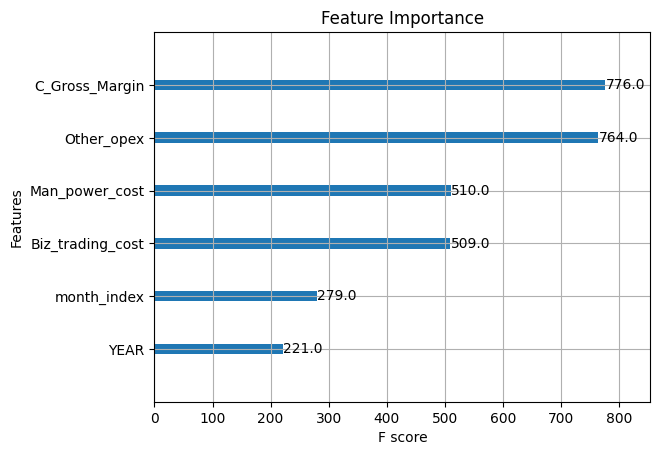

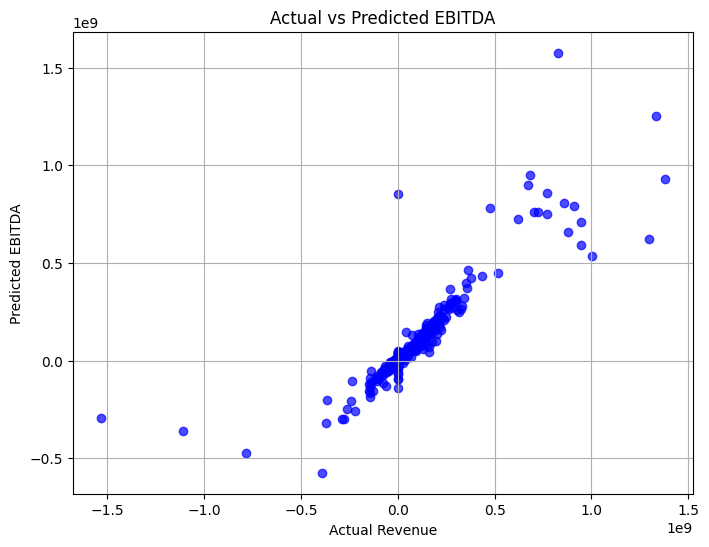

In [16]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_3)
plt.title("Feature Importance")
plt.show()

#Scatter Plot of Actual vs. Predicted EBITDA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_e, y_pred_e, alpha=0.7, color='blue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted EBITDA')
plt.title('Actual vs Predicted EBITDA')
plt.grid(True)
plt.show()

In [17]:
#mean absolute % error
mape_value_e = calculate_mape(y_test_e, y_pred_e)
print(f'MAPE: {mape_value_e:.2f}%')

MAPE: 55.50%


In [18]:
smape_value_e = calculate_smape(y_test_e, y_pred_e)
print(f'SMAPE: {smape_value_e:.2f}%')

SMAPE: 34.50%


In [19]:
#Actual vs Predicted ebitda
month_year_ed = df[['YEAR', 'month_index']].iloc[-len(y_test_e):].reset_index(drop=True)
month_year_ed['Month-Year-ebitda'] = pd.to_datetime(month_year_ed['YEAR'].astype(str) + '-' + month_year_ed['month_index'].astype(str).str.zfill(2))
y_pred_series_e = pd.Series(y_pred_e).reset_index(drop=True)
# Create DataFrame
results_df_e = pd.DataFrame({
    'Month-Year-ebitda': month_year_ed['Month-Year-ebitda'],
    'Actual': y_test_e.reset_index(drop=True),
    'Predicted': y_pred_series_e.reset_index(drop=True)
})
results_df_e = results_df_e.sort_values(by='Month-Year-ebitda')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df_e = results_df_e[results_df_e['Month-Year-ebitda'] <= max_date]
filtered_results_df_e = filtered_results_df_e.groupby('Month-Year-ebitda').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df_e['Month-Year-ebitda'],
    y=filtered_results_df_e['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df_e['Month-Year-ebitda'],
    y=filtered_results_df_e['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted EBITDA',
    xaxis_title='Month-Year-ebitda',
    yaxis_title='EBITDA',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45 
)
fig.show()

## Prediction of EBIT

In [20]:
#feature selection
features_rev = ['C_EBITDA', ' DEPRECIATION ON ASSET ','YEAR','month_index']

x= df[features_rev]
Y = df['C_EBIT']

#Train-Test Split
X_train_eb, X_test_eb, y_train_eb, y_test_eb = train_test_split(x, Y, test_size=0.2, random_state=42)

#Model Training
model_4 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_4.fit(X_train_eb, y_train_eb)

#Model Evaluation

y_pred_eb = model_4.predict(X_test_eb)

<Figure size 1000x600 with 0 Axes>

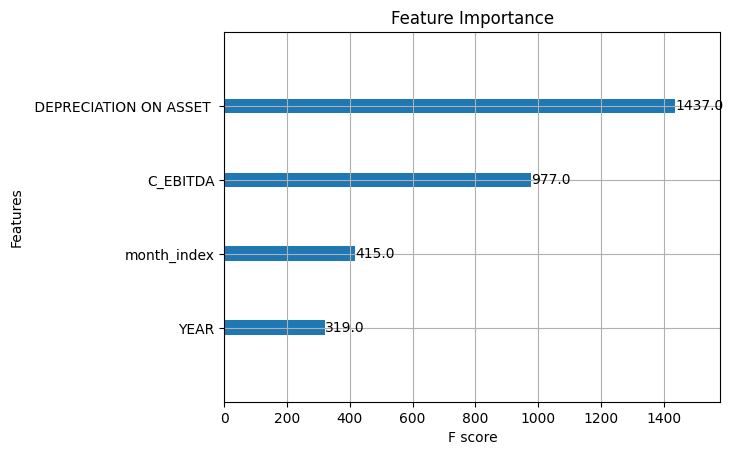

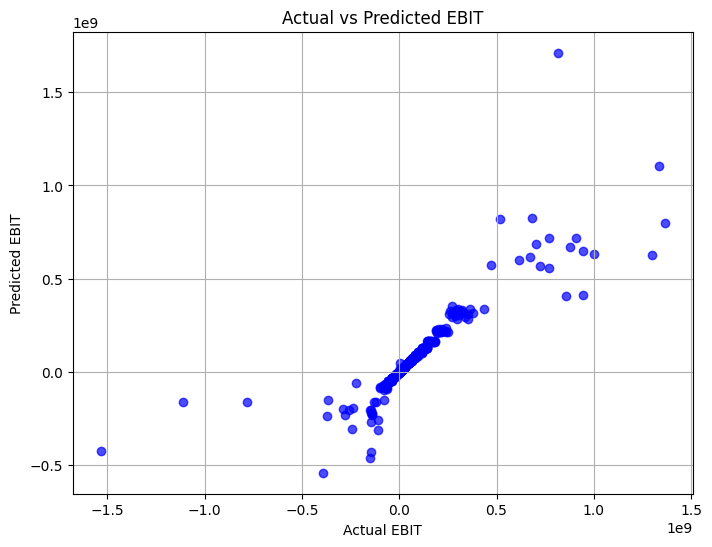

In [21]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_4)
plt.title("Feature Importance")
plt.show()

#Scatter Plot of Actual vs. Predicted EBIT
plt.figure(figsize=(8, 6))
plt.scatter(y_test_eb, y_pred_eb, alpha=0.7, color='blue')
plt.xlabel('Actual EBIT')
plt.ylabel('Predicted EBIT')
plt.title('Actual vs Predicted EBIT')
plt.grid(True)
plt.show()

In [22]:
#mean absolute % error
mape_value_eb = calculate_mape(y_test_eb, y_pred_eb)
print(f'MAPE: {mape_value_eb:.2f}%')

MAPE: 4.44%


In [23]:
#Actual vs Predicted ebit
month_year_eb = df[['YEAR', 'month_index']].iloc[-len(y_test_e):].reset_index(drop=True)
month_year_eb['Month-Year-ebit'] = pd.to_datetime(month_year_eb['YEAR'].astype(str) + '-' + month_year_eb['month_index'].astype(str).str.zfill(2))
y_pred_series_eb = pd.Series(y_pred_eb).reset_index(drop=True)
# Create DataFrame
results_df_eb = pd.DataFrame({
    'Month-Year-ebit': month_year_eb['Month-Year-ebit'],
    'Actual': y_test_eb.reset_index(drop=True),
    'Predicted': y_pred_series_eb.reset_index(drop=True)
})
results_df_eb = results_df_eb.sort_values(by='Month-Year-ebit')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df_eb = results_df_eb[results_df_eb['Month-Year-ebit'] <= max_date]
filtered_results_df_eb = filtered_results_df_eb.groupby('Month-Year-ebit').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df_eb['Month-Year-ebit'],
    y=filtered_results_df_eb['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df_eb['Month-Year-ebit'],
    y=filtered_results_df_eb['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted EBIT',
    xaxis_title='Month-Year-ebit',
    yaxis_title='EBIT',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45 
)
fig.show()

## Prediction of Profit Before Tax (PBT)

In [24]:
#feature selection
features_rev = [' EBIT ', ' FACTORING ',' WORKING CAPITAL INTEREST ','YEAR','month_index']

x= df[features_rev]
Y = df[' PROFIT BEFORE TAX ']

#Train-Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x, Y, test_size=0.2, random_state=42)

#Model Training
model_5 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_5.fit(X_train_p, y_train_p)

#Model Evaluation

y_pred_p = model_5.predict(X_test_p)

In [26]:
#mean absolute % error

mape_value_p = calculate_mape(y_test_p, y_pred_p)
print(f'MAPE: {mape_value_p:.2f}%')

MAPE: 172254.99%


In [27]:
smape_value_p = calculate_smape(y_test_p, y_pred_p)
print(f'SMAPE: {smape_value_p:.2f}%')

SMAPE: 23.03%


In [48]:
df[' EBIT ']

0       -2.574305e+05
1       -2.574305e+05
2       -2.574305e+05
3       -2.574305e+05
4       -2.574305e+05
             ...     
28448    6.194320e+06
28449   -2.904229e+06
28450   -7.283709e+07
28451    6.384499e+05
28452    5.047126e+08
Name:  EBIT , Length: 28453, dtype: float64

In [28]:
#Actual vs Predicted PBT
month_year_p = df[['YEAR', 'month_index']].iloc[-len(y_test_p):].reset_index(drop=True)
month_year_p['Month-Year-pbt'] = pd.to_datetime(month_year_p['YEAR'].astype(str) + '-' + month_year_p['month_index'].astype(str).str.zfill(2))
y_pred_series_p = pd.Series(y_pred_p).reset_index(drop=True)
# Create DataFrame
results_df_p = pd.DataFrame({
    'Month-Year-pbt': month_year_p['Month-Year-pbt'],
    'Actual': y_test_p.reset_index(drop=True),
    'Predicted': y_pred_series_p.reset_index(drop=True)
})
results_df_p = results_df_p.sort_values(by='Month-Year-pbt')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df_p = results_df_p[results_df_p['Month-Year-pbt'] <= max_date]
filtered_results_df_p = filtered_results_df_p.groupby('Month-Year-pbt').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df_p['Month-Year-pbt'],
    y=filtered_results_df_p['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df_p['Month-Year-pbt'],
    y=filtered_results_df_p['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted PBT',
    xaxis_title='Month-Year-pbt',
    yaxis_title='PBT',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45 
)
fig.show()

In [49]:
# Generate Future Dates: From April to Next March
current_year = df['YEAR'].max()
future_dates = pd.date_range(
    start=f"{current_year}-04-01",  # Start from April of the current year
    end=f"{current_year + 1}-03-31",  # End at March of the next year
    freq='MS'  # Monthly start frequency
).to_period('M').to_timestamp()

# Prepare Future Features with Consistent Column Order
future_features = pd.DataFrame({
    'YEAR': future_dates.year,
    'month_index': future_dates.month,
    ' FACTORING ': [df[' FACTORING '].mean()] * len(future_dates),  # Impute with mean
    ' WORKING CAPITAL INTEREST ': [df[' WORKING CAPITAL INTEREST '].mean()] * len(future_dates),  # Impute with mean
    ' EBIT ': [df[' EBIT '].mean()] * len(future_dates)  # Impute with mean
})

# Ensure consistent column order for prediction
feature_order = [' EBIT ', ' FACTORING ',' WORKING CAPITAL INTEREST ','YEAR','month_index']
future_features = future_features[feature_order]

# Predict PBT for the specified date range
future_pbt_predictions = model_5.predict(future_features)

# Combine Future Predictions
future_results_df_p = pd.DataFrame({
    'Month-Year-pbt': pd.to_datetime(future_dates),
    'Actual': [None] * len(future_dates),  # No actual values for future
    'Predicted': future_pbt_predictions
})

# Combine Historical and Future Results
results_df_p['Month-Year-pbt'] = pd.to_datetime(results_df_p['Month-Year-pbt'])
extended_results_df_p = pd.concat([results_df_p, future_results_df_p]).reset_index(drop=True)

# Sort by Month-Year-pbt
extended_results_df_p = extended_results_df_p.sort_values(by='Month-Year-pbt')

# Group by Month-Year-pbt (if needed)
filtered_results_df_extended_p = extended_results_df_p.groupby('Month-Year-pbt').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

# Plotting Extended Predictions
fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=filtered_results_df_extended_p['Month-Year-pbt'],
    y=filtered_results_df_extended_p['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

# Predicted Values
fig.add_trace(go.Scatter(
    x=filtered_results_df_extended_p['Month-Year-pbt'],
    y=filtered_results_df_extended_p['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

# Update Layout
fig.update_layout(
    title='Actual vs Predicted PBT (April to March)',
    xaxis_title='Month-Year-pbt',
    yaxis_title='PBT',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45
)

fig.show()


C:\Users\91882\AppData\Local\Temp\ipykernel_50032\2447454080.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [47]:
df.columns

Index(['BUSINESS GROUP', 'MATERIAL GROUP', 'YEAR', 'MONTH', ' SALES SERVICE ',
       ' LESS ORC ', ' NET SALES ', ' COST OF GOODS SOLD ',
       ' TRANSACTION MARGIN ', ' BACKEND INCOME ', ' ESTIMATE INCOME ',
       ' TOTAL BACKEND INCOME ', ' DEPRECIATION INVENTORY ',
       ' SALES COMMISSION ', ' GROSS MARGIN ', ' CASH DISCOUNT ',
       ' GROSS MARGIN CD ', ' OTHER INCOME ', ' FREIGHT ', ' INSURANCE ',
       ' COMMERCIAL TAX ', ' DRIECT EXPENSES ', ' COMPENSATION ',
       ' STAFF WELFATE ', ' OUTSOURCED RESOURCE ', ' TRAVEL ', ' CONVEYANCE ',
       ' COMMUNICATION ', ' UTILITIES ', ' REPAIRS MAINTENANCE ',
       ' PRINTING STATIONERY ', ' RENT ', ' RENT WAREHOUSE ',
       ' WAREHOUSE EXPENSES ', ' ENTERTAINMENT ', ' TRAINING ',
       ' ADVERTISMENT EXPENSES ', ' BAD DEBTS ', ' BANK CHARGES ',
       ' RATE TAXES ', ' CONSULTANCY BROKER ', ' AUDIT FEE ',
       ' FALSE GAIN OR LOSS ', ' EXCHANGE GAIN OR LOSS ',
       ' DIRECT SITTING FEE ', ' CSR ', ' FACTORING ', ' OTHER E

## Prediction of Profit After Tax (PAT)

In [37]:
#feature selection
features_rev = ['C_PBT','YEAR','month_index',' TAX EXPENSES ']

x= df[features_rev]
Y = df['C_PAT']

#Train-Test Split
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(x, Y, test_size=0.2, random_state=42)

#Model Training
model_6 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_6.fit(X_train_pa, y_train_pa)
    
#Model Evaluation

y_pred_pa = model_6.predict(X_test_pa)

In [38]:
#mean absolute % error

mape_value_pa = calculate_mape(y_test_pa, y_pred_pa)
print(f'MAPE: {mape_value_pa:.2f}%')

MAPE: 20.49%


In [39]:
#Actual vs Predicted PAT
month_year_pa = df[['YEAR', 'month_index']].iloc[-len(y_test_pa):].reset_index(drop=True)
month_year_pa['Month-Year-pat'] = pd.to_datetime(month_year_pa['YEAR'].astype(str) + '-' + month_year_p['month_index'].astype(str).str.zfill(2))
y_pred_series_pa = pd.Series(y_pred_pa).reset_index(drop=True)
y_test_pa_f = pd.Series(y_test_pa).reset_index(drop=True)
# Create DataFrame
results_df_pa = pd.DataFrame({
    'Month-Year-pat': month_year_pa['Month-Year-pat'],
    'Actual': y_test_pa_f,
    'Predicted': y_pred_series_pa.reset_index(drop=True)
})

results_df_pa = results_df_pa.sort_values(by='Month-Year-pat')
max_date = pd.Timestamp("2024-03-31")

# Filter the results
filtered_results_df_pa = results_df_pa[results_df_pa['Month-Year-pat'] <= max_date]
filtered_results_df_pa = filtered_results_df_pa.groupby('Month-Year-pat').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

fig = go.Figure()

#actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df_pa['Month-Year-pat'],
    y=filtered_results_df_pa['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

#predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df_pa['Month-Year-pat'],
    y=filtered_results_df_pa['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted PAT',
    xaxis_title='Month-Year-pat',
    yaxis_title='PAT',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45 
)
fig.show()

In [50]:
# Generate Future Dates: From April to Next March
current_year = df['YEAR'].max()
future_dates = pd.date_range(
    start=f"{current_year}-04-01",  # Start from April of the current year
    end=f"{current_year + 1}-03-31",  # End at March of the next year
    freq='MS'  # Monthly start frequency
).to_period('M').to_timestamp()

# Prepare Future Features with Consistent Column Order
future_features = pd.DataFrame({
    'YEAR': future_dates.year,
    'month_index': future_dates.month,
    ' TAX EXPENSES ': [df[' TAX EXPENSES '].mean()] * len(future_dates),  # Impute with mean
    'C_PBT': [df['C_PBT'].mean()] * len(future_dates)  # Impute with mean
})

# Ensure consistent column order for prediction
feature_order = ['C_PBT', 'YEAR', 'month_index', ' TAX EXPENSES ']
future_features = future_features[feature_order]

# Predict PAT for the specified date range
future_pat_predictions = model_6.predict(future_features)

# Combine Future Predictions
future_results_df = pd.DataFrame({
    'Month-Year-pat': pd.to_datetime(future_dates),
    'Actual': [None] * len(future_dates),  # No actual values for future
    'Predicted': future_pat_predictions
})

# Combine Historical and Future Results
results_df_pa['Month-Year-pat'] = pd.to_datetime(results_df_pa['Month-Year-pat'])
extended_results_df = pd.concat([results_df_pa, future_results_df]).reset_index(drop=True)

# Sort by Month-Year-pat
extended_results_df = extended_results_df.sort_values(by='Month-Year-pat')

# Group by Month-Year-pat (if needed)
filtered_results_df_extended = extended_results_df.groupby('Month-Year-pat').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

# Plotting Extended Predictions
fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=filtered_results_df_extended['Month-Year-pat'],
    y=filtered_results_df_extended['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

# Predicted Values
fig.add_trace(go.Scatter(
    x=filtered_results_df_extended['Month-Year-pat'],
    y=filtered_results_df_extended['Predicted'],
    mode='lines+markers',
    name='Predicted Values',
    line=dict(color='red', dash='dash')
))

# Update Layout
fig.update_layout(
    title='Actual vs Predicted PAT (April to March)',
    xaxis_title='Month-Year-pat',
    yaxis_title='PAT',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    template='plotly_dark', 
    xaxis_tickangle=-45
)

fig.show()


C:\Users\91882\AppData\Local\Temp\ipykernel_50032\2306536044.py:33: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [32]:
#future gross margin prediction

#monthly mean of gross margin features
monthly = df.groupby(['month_index'])[[' GROSS MARGIN ', ' CASH DISCOUNT ', ' OTHER INCOME ']].mean().reset_index()
monthly = pd.DataFrame(monthly)
# Generate future dates
future_dates = pd.date_range(start=pd.Timestamp('2024-04-01'), end=pd.Timestamp('2025-03-31'), freq='MS') 
future_months = []
for future_date in future_dates:
    future_months.append({
        'YEAR': future_date.year,
        'month_index': future_date.month
    })
future_df = pd.DataFrame(future_months)
future_df = pd.merge(future_df, monthly, on='month_index', how='left', suffixes=('_future', '_mean'))
# Prepare the features 
future_X = future_df[[' GROSS MARGIN ', ' CASH DISCOUNT ', ' OTHER INCOME ','YEAR','month_index']]
#prediction
future_gm = model.predict(future_X)
future_df['Predicted_Gm'] = future_gm
future_df

,YEAR,month_index,GROSS MARGIN,CASH DISCOUNT,OTHER INCOME,Predicted_Gm
0,2024,4,6.964798e+06,2.287408e+06,3.024863e+05,6664422.0
1,2024,5,1.010418e+07,1.539826e+06,4.259553e+05,10230152.0
2,2024,6,2.402414e+07,1.274991e+06,5.206231e+05,23656528.0
3,2024,7,7.769892e+06,2.262214e+06,3.001933e+07,11693284.0
4,2024,8,1.093403e+07,1.766196e+06,1.419649e+07,11186692.0
5,2024,9,2.261246e+07,1.766033e+06,6.309172e+05,22731860.0
6,2024,10,9.084677e+06,2.518425e+06,3.879255e+05,8416531.0
7,2024,11,9.977072e+06,1.716375e+06,2.255014e+06,10286792.0
8,2024,12,2.588968e+07,1.333849e+06,9.565017e+05,25385914.0
9,2025,1,5.238653e+06,2.108983e+06,3.606213e+05,4882932.0


In [33]:
# Historical data
month_year = df[['YEAR', 'month_index']].iloc[-len(y_test):].reset_index(drop=True)
month_year['Month-Year'] = pd.to_datetime(month_year['YEAR'].astype(str) + '-' + month_year['month_index'].astype(str).str.zfill(2))
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

# Create historical results DataFrame
results_df = pd.DataFrame({
    'Month-Year': month_year['Month-Year'],
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred_series.reset_index(drop=True)
})
results_df = results_df.sort_values(by='Month-Year')

# Group historical data by Month-Year
max_date = pd.Timestamp("2024-03-31")
filtered_results_df = results_df[results_df['Month-Year'] <= max_date]
filtered_results_df = filtered_results_df.groupby('Month-Year').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()

# Prepare future data
future_df['Month-Year'] = pd.to_datetime(future_df['YEAR'].astype(str) + '-' + future_df['month_index'].astype(str).str.zfill(2))
future_results_df = future_df[['Month-Year', 'Predicted_Gm']].rename(columns={'Predicted_Gm': 'Predicted'})

# Combine historical and future predictions
combined_results_df = pd.concat([filtered_results_df, future_results_df], ignore_index=True)

fig = go.Figure()

# Historical actual values
fig.add_trace(go.Scatter(
    x=filtered_results_df['Month-Year'],
    y=filtered_results_df['Actual'],
    mode='lines+markers',
    name='Actual Values',
    line=dict(color='blue')
))

# Historical predicted values
fig.add_trace(go.Scatter(
    x=filtered_results_df['Month-Year'],
    y=filtered_results_df['Predicted'],
    mode='lines+markers',
    name='Predicted Values (Historical)',
    line=dict(color='red', dash='dash')
))

# Future predicted values
fig.add_trace(go.Scatter(
    x=future_results_df['Month-Year'],
    y=future_results_df['Predicted'],
    mode='lines+markers',
    name='Predicted Values (Future)',
    line=dict(color='green', dash='dot')
))

fig.update_layout(
    title='Actual vs Predicted GROSS MARGIN (Including Future Predictions)',
    xaxis_title='Month-Year',
    yaxis_title='GROSS MARGIN',
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    template='plotly_dark',
    xaxis_tickangle=-45
)
fig.show()


In [34]:
#saving future prediction as excel

output_file = 'future_gm.xlsx' 
future_df.to_excel(output_file, index=False)

In [35]:
#hyper parameter tuning
       
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=3,  
    verbose=2,
    n_jobs=-1
)

# Prepare features 
X_train = df[[' GROSS MARGIN ', ' CASH DISCOUNT ', ' OTHER INCOME ', 'YEAR', 'month_index']]
y_train = df[' GROSS MARGIN ']

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_

# Predict future gross margin
future_X = future_df[[' GROSS MARGIN ', ' CASH DISCOUNT ', ' OTHER INCOME ', 'YEAR', 'month_index']]
future_df['Predicted_Gm'] = best_model.predict(future_X)
future_df

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 2284462549518297.5


,YEAR,month_index,GROSS MARGIN,CASH DISCOUNT,OTHER INCOME,Predicted_Gm,Month-Year
0,2024,4,6.964798e+06,2.287408e+06,3.024863e+05,4919969.50,2024-04-01
1,2024,5,1.010418e+07,1.539826e+06,4.259553e+05,7767992.50,2024-05-01
2,2024,6,2.402414e+07,1.274991e+06,5.206231e+05,20586400.00,2024-06-01
3,2024,7,7.769892e+06,2.262214e+06,3.001933e+07,5833160.00,2024-07-01
4,2024,8,1.093403e+07,1.766196e+06,1.419649e+07,8408663.00,2024-08-01
5,2024,9,2.261246e+07,1.766033e+06,6.309172e+05,19503610.00,2024-09-01
6,2024,10,9.084677e+06,2.518425e+06,3.879255e+05,6727771.00,2024-10-01
7,2024,11,9.977072e+06,1.716375e+06,2.255014e+06,7767992.50,2024-11-01
8,2024,12,2.588968e+07,1.333849e+06,9.565017e+05,22008602.00,2024-12-01
9,2025,1,5.238653e+06,2.108983e+06,3.606213e+05,3352950.75,2025-01-01
